In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ode_int_rk(func, y_0, t, args={}):
    """ Classical Runge-Kutta (RK4) approximation to a first-order ODE system
    with initial conditions.

    Args:
        func: (callable) The first-order ODE system to be approximated.
        y_0: (array) The initial condition.
        t: (array) A sequence of time points for which to solve for y.
        args: (dict) Extra arguments to pass to function.

    Out:
        y: (array) the approximated solution of the system at each time in t,
            with the initial value y_0 in the first row.
    """

    # Initialise the approximation array
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, t_i in enumerate(t[:-1]):

        h = t[i+1] - t_i # size of the step

        k_1 = func(t_i, y[i], args)
        k_2 = func(t_i+h/2., y[i]+h/2.*k_1, args)
        k_3 = func(t_i+h/2., y[i]+h/2.*k_2, args)
        k_4 = func(t_i+h, y[i]+h*k_3, args)

        y[i+1] = y[i] + h/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step

    return y

In [3]:
def exp(t, y, args):
    """ An exponential function described as a first-order ODE. """
    
    dydt = args['a']*y
    return dydt

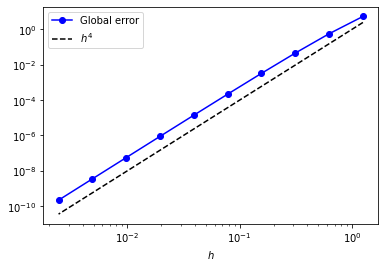

In [4]:
y_0 = np.array([1.]) # Initial condition

solve_args = {}
solve_args['a'] = 1.

t_max = 5.

# Range of stepsizes
max_N = 12
N = 2**np.arange(2, max_N) # N = 2, 4, 8, ..., 2^max_N

order_check = 4 # for visual check of the order of accuracy

y_end = np.zeros(len(N)) # array to fill with the final values
stepsize = np.zeros(len(N)) # array to fill with the stepsizes

for i, N_i in enumerate(N): # loop over different numbers of steps

    t = np.linspace(0., t_max, N_i+1)
    y_end[i] = ode_int_rk(exp, y_0, t, solve_args)[-1]
    
    stepsize[i] = t_max/N_i
    
plt.loglog(stepsize, abs(y_end - np.exp(solve_args['a']*t_max)), 
           'b-o', label='Global error')
plt.loglog(stepsize, stepsize**order_check,'k--', label=r'$h^4$')
plt.xlabel(r'$h$')
plt.legend(loc=2)

# A Forced and Damped Pendulum

In [7]:
def pendulum(t, y, args):
    """ A damped and forced pendulum, described as set of two first-order ODEs.

    Args:
        t: Time
        y: Pendulum system vector [angle, angular velocity] 
        args['alpha']: gravity_acc/length_of_pendulum
        args['beta']: friction_constant/mass_pendulum
        args['gamma']: driving_force/mass_pendulum/length_pendulum
        args['omega']: driving_freq

    Returns:
        dydt: ODE vector
    """

    dydt = np.zeros(2)

    dydt[0] = y[1]
    dydt[1] = (-args['alpha']*np.sin(y[0]) - args['beta']*y[1] + 
                args['gamma']*np.cos(args['omega']*t))

    return dydt

In [8]:
gravity_acc = 10. # [m /s2]

length_pendulum = 1. # [m]
mass_pendulum = 1. # [kg]
friction_constant = 0. # [kg /m /s]

driving_force = 0. # [N]
driving_freq = 0. # [2π /s]

N = 200

t = np.linspace(0., 10., N+1) # [s] an array of time steps

In [9]:
solve_args = {}
solve_args['alpha'] = gravity_acc/length_pendulum
solve_args['beta'] = friction_constant/mass_pendulum
solve_args['gamma'] = driving_force/mass_pendulum/length_pendulum
solve_args['omega'] = driving_freq

In [10]:
initial_ang = np.pi/8 # [rad]
initial_ang_vel = 0. # [rad /s]
initial_cond = np.array([initial_ang, initial_ang_vel])

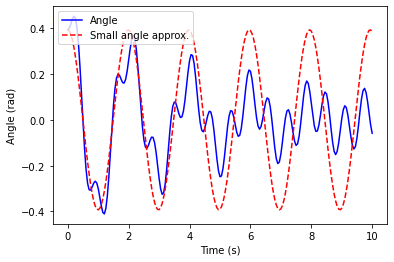

In [36]:
from scipy.integrate import odeint

# y = odeint(pendulum, initial_cond, t, args=(solve_args,))

# Solve Pendulum ODE with RK4
y = ode_int_rk(pendulum, initial_cond, t, solve_args)

y_small_ang = initial_ang*np.cos(np.sqrt(solve_args['alpha'])*t)

plt.plot(t, y[:,0], c='b', label='Angle')
plt.plot(t, y_small_ang, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend(loc=2)

In [37]:
def plot_pendulum(t,y):
    """ Plot Angle, Phase Diagram, FFT. """
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Time (s)')
    ax_1.set_ylabel('Angle (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angle (rad)')
    ax_2.set_ylabel('Angular Velocity (rad /s)')
    
    # Fourier Transform
    f_fft = np.fft.fftfreq(len(t), t[1]-t[0])
    y_fft = np.fft.fft(y[:,0])/np.sqrt(2*len(t))
    
    # Plot Power Spectrum
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:N]*np.pi, abs(y_fft[:N]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Ang Freq ($2 \pi$ Hz)')
    ax_3.set_ylabel('Power')

In [ ]:
friction_constant = .5 # [kg /m /s]
solve_args['beta'] = friction_constant/mass_pendulum

# Solve Pendulum ODE with RK4
y = ode_int_rk(pendulum, initial_cond, t, solve_args)

plot_pendulum(t,y)

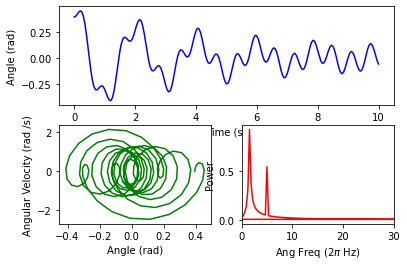

In [40]:
driving_force = 10. # [N]
driving_freq = 10. # [2π /s]

solve_args['gamma'] = driving_force/mass_pendulum/length_pendulum
solve_args['omega'] = driving_freq

# Solve Pendulum ODE with RK4
y = ode_int_rk(pendulum, initial_cond, t, solve_args)

plot_pendulum(t,y)

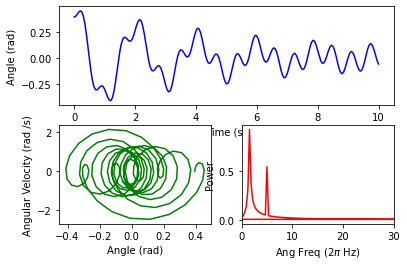

In [38]:
plot_pendulum(t,y)